# Домашнее задание 1

### Выполнил Штанько Константин, группа 4

Для начала нам необходимо получить таблицу c данными. Для начала обозначим `расшифровку` каждого столбца для понимания того, что мы анализируем. Давайте выведем ее на экран:

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, norm, probplot, levene, f_oneway, kruskal

data = pd.read_excel('russian_regions.xlsx', sheet_name='Data')

desc = pd.read_excel('russian_regions.xlsx', sheet_name='Description of data')
print("Таблица 1. Описание данных")
print(desc.to_string(index=False))

Таблица 1. Описание данных
                      Переменная                                                                       Описание переменной
                 Q_OF_LIFE_INDEX                                                                    РЕЙТИНГ КАЧЕСТВА ЖИЗНИ
                  AVERAGE_INCOME                                     СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ В МЕС. (руб.)
                             GRP                                                              ВРП НА ДУШУ НАСЕЛЕНИЯ (руб.)
            POP_PER_HOSPITAL_BED                       ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНУ БОЛЬНИЧНУЮ КОЙКУ НА КОНЕЦ ГОДА (чел.)
                  POP_PER_DOCTOR                                                     ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНОГО ВРАЧА
                   SICKNESS_RATE                                                   ЗАБОЛЕВАЕМОСТЬ (на 1000 чел. населения)
       ATMOSPHERIC_AIR_POLLUTION                             ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ (

Теперь посмотрим на саму таблицу с данными, в которой содержатся `различные показатели по регионам России`:

In [125]:
data.head()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,48.063407,29103.975309,4.277426e+05,121.255556,218.074074,790.765432,210.703704,0.399817,7.122222,0.283674,0.305550,48811.850772,0.896640,34807.349236,46325.949121,76.133470,54.903409
std,11.436130,10907.045156,3.088424e+05,21.110880,40.129954,159.898472,403.671817,0.292327,4.121104,0.054079,0.058050,94022.928565,0.219001,13177.414658,17915.619872,7.271893,4.857662
min,19.105000,15603.000000,1.148441e+05,76.200000,123.100000,428.300000,1.000000,0.000000,2.600000,0.101905,0.116667,1098.500000,0.288545,22114.799304,23006.176368,59.464015,39.475590
25%,41.395000,23270.000000,2.531004e+05,109.600000,193.200000,685.600000,31.000000,0.130952,5.000000,0.259524,0.282857,14619.246250,0.815531,26653.970458,34568.902008,72.104932,52.598810
50%,48.063000,25888.000000,3.671382e+05,121.100000,218.700000,767.400000,84.000000,0.423313,5.900000,0.283810,0.303333,27372.493750,0.872834,31127.016566,41616.546397,75.614298,55.041500
75%,54.379000,30778.000000,4.533023e+05,131.100000,239.100000,905.700000,204.000000,0.572204,7.700000,0.315714,0.336190,42723.368750,0.977018,36825.279251,50519.846072,78.612332,57.197880
max,81.352000,78812.000000,1.900323e+06,225.500000,341.400000,1278.300000,2319.000000,1.168305,29.800000,0.465714,0.546667,779432.118750,2.354780,87822.617122,112419.904787,97.980853,65.233960


In [126]:
data.describe()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,48.063407,29103.975309,4.277426e+05,121.255556,218.074074,790.765432,210.703704,0.399817,7.122222,0.283674,0.305550,48811.850772,0.896640,34807.349236,46325.949121,76.133470,54.903409
std,11.436130,10907.045156,3.088424e+05,21.110880,40.129954,159.898472,403.671817,0.292327,4.121104,0.054079,0.058050,94022.928565,0.219001,13177.414658,17915.619872,7.271893,4.857662
min,19.105000,15603.000000,1.148441e+05,76.200000,123.100000,428.300000,1.000000,0.000000,2.600000,0.101905,0.116667,1098.500000,0.288545,22114.799304,23006.176368,59.464015,39.475590
25%,41.395000,23270.000000,2.531004e+05,109.600000,193.200000,685.600000,31.000000,0.130952,5.000000,0.259524,0.282857,14619.246250,0.815531,26653.970458,34568.902008,72.104932,52.598810
50%,48.063000,25888.000000,3.671382e+05,121.100000,218.700000,767.400000,84.000000,0.423313,5.900000,0.283810,0.303333,27372.493750,0.872834,31127.016566,41616.546397,75.614298,55.041500
75%,54.379000,30778.000000,4.533023e+05,131.100000,239.100000,905.700000,204.000000,0.572204,7.700000,0.315714,0.336190,42723.368750,0.977018,36825.279251,50519.846072,78.612332,57.197880
max,81.352000,78812.000000,1.900323e+06,225.500000,341.400000,1278.300000,2319.000000,1.168305,29.800000,0.465714,0.546667,779432.118750,2.354780,87822.617122,112419.904787,97.980853,65.233960


#### **Задание 1:**
Выделим из таблицы столбец `Рейтинг уровня качества жизни (Q_OF_LIFE_INDEX)` и вычислим различные характеристики, связанные с данной выборкой:

In [127]:
qoli = data['Q_OF_LIFE_INDEX']
statistics = qoli.describe()
statistics['range'] = statistics['max'] - statistics['min']
statistics['IQR'] = statistics['75%'] - statistics['25%']
statistics['kurtosis'] = qoli.kurt()
statistics['skewness'] = qoli.skew()
new_indexes = ['median' if x == '50%' else x for x in list(statistics.index)]
statistics.index = new_indexes
print(f"Среднее значение: {statistics['mean']:.4f}")
print(f"Стандартное отклонение: {statistics['std']:.4f}")
print(f"Дисперсия: {statistics['std'] ** 2:.4f}")
print(f"Минимальное значение: {statistics['min']:.4f}")
print(f"Максимальное значение: {statistics['max']:.4f}")
print(f"Размах: {statistics['range']:.4f}")
print(f"Квартиль 0.25: {statistics['25%']:.4f}")
print(f"Медиана: {statistics['median']:.4f}")
print(f"Квартиль 0.75: {statistics['75%']:.4f}")
print(f"Интерквартильный размах (IQR): {statistics['IQR']:.4f}")
print(f"Коэффициент асимметрии: {statistics['skewness']:.4f}")
print(f"Коэффициент эксцесса: {statistics['kurtosis']:.4f}")




Среднее значение: 48.0634
Стандартное отклонение: 11.4361
Дисперсия: 130.7851
Минимальное значение: 19.1050
Максимальное значение: 81.3520
Размах: 62.2470
Квартиль 0.25: 41.3950
Медиана: 48.0630
Квартиль 0.75: 54.3790
Интерквартильный размах (IQR): 12.9840
Коэффициент асимметрии: 0.3968
Коэффициент эксцесса: 0.9892


Таким образом, можно заметить, что среднее находится почти на уровне с медианой (немного правее), однако коэффициент асимметрии больше нуля, а это значит, что наблюдается небольшая **правосторонняя асимметрия**. 

Если же говорить про коэффициент эксцесса, то он больше нуля, а это свидетельствует об **островершинности распределения** по сравнению с нормальным.

Следовательно, можно сделать вывод, что **предположение о нормальности распределения скорее будет отвергнуто**.

#### **Задание 2**
Проверим, есть ли основания по выборке полагать, что распределение рейтинга уровня качества жизни (*QOLI*) подчиняется логнормальному закону (логарифм выборки принадлежит нормальному распределению). Для этого **прологарифмируем значения и построим гистограмму с квантильным графиком**, чтобы визуально оценить принадлежность к нормальному закону.

`Построим данные графики` (к гистограмме добавим *ядерную оценку плотности* (KDE) для сглаженного вида распределения):

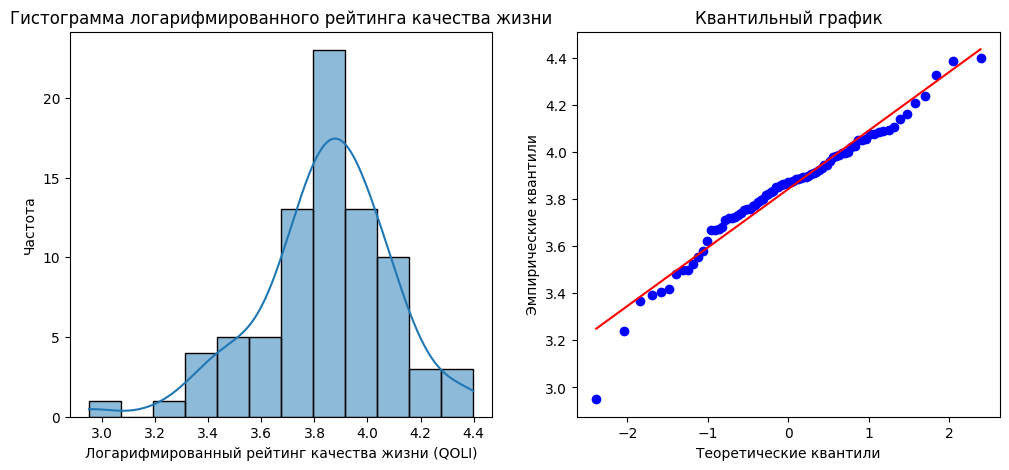

In [129]:
log_qoli = np.log(qoli)
figure, (x, y) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(log_qoli, kde=True, ax=x)
x.set_title('Гистограмма логарифмированного рейтинга качества жизни')
probplot(log_qoli, plot=y)
y.set_title('Квантильный график')

x.set_xlabel('Логарифмированный рейтинг качества жизни (QOLI)')
x.set_ylabel('Частота')
y.set_xlabel('Теоретические квантили')
y.set_ylabel('Эмпирические квантили')

plt.show()

Можно заметить, что распределение несущественно, но отклоняется от вида нормального распределения. Действительно, можно заметить наглядно островершинность и асимметрию распределения. По квантильному же графику можно заметить отклонения от нормальности, которые дают понять, что гипотеза о нормальности может быть отвергнута.

Для точной проверки проведем `тест Шапиро-Уилка` проверки распределения на нормальность. Так как вероятность ошибки не задана, то возьмем ее на уровне **0.05** (уровень доверия равен 0.95):

Получим результаты теста независимости по `точному критерию Фишера`:

In [65]:
s, pval = shapiro(log_qoli)
print(f'По тесту Шапиро-Уилка p-value составляет {pval:.4f}')

По тесту Шапиро-Уилка p-value составляет 0.0369


Так как p-value меньше 0.05, то гипотеза о принадлежности распределения к нормальному **отвергается** с заданным уровнем ошибки.

#### **Задание 3:**
Изобразим `ящичковую диаграмму (boxplot)` и посмотрим на вид распределения:

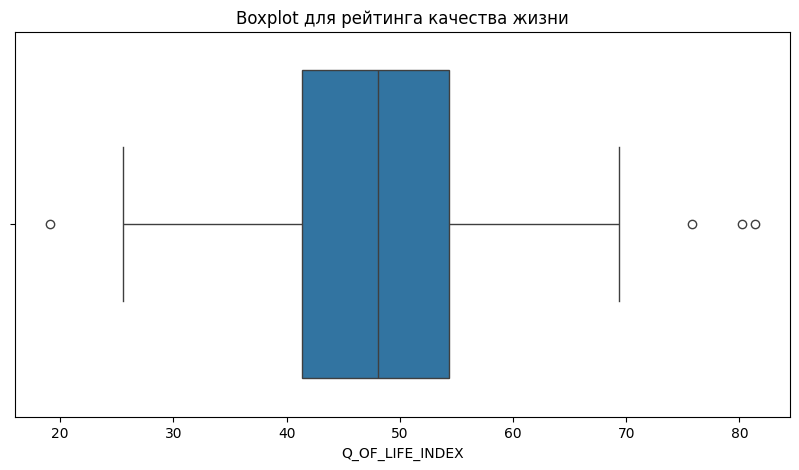

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=qoli)
plt.title('Boxplot для рейтинга качества жизни')
plt.show()

Таким образом, можно заметить, что наблюдаются выбросные значения в количестве **4 штук**. `Найдем их с помощью правила 1.5IQR`:

In [82]:
outliers = qoli[(qoli < (statistics['25%'] - 1.5 * statistics['IQR'])) | (qoli > (statistics['75%'] + 1.5 * statistics['IQR']))]
print(f"Таким образом, было выявлено следующие {len(outliers)} выброса:")
print(outliers.to_string(index=False))

Таким образом, было выявлено следующие 4 выброса:
75.858
81.352
80.241
19.105


`Удалим найденные выбросы` из таблицы, так как они могут влиять на выводы по гипотезам:

In [91]:
qoli_wo = qoli[~qoli.isin(outliers)]
print('Таблица QOLI без выбросов')
qoli_wo

Таблица QOLI без выбросов


0     64.149
1     49.343
2     50.967
3     59.327
4     47.754
       ...  
76    39.650
77    44.517
78    52.643
79    28.940
80    42.933
Name: Q_OF_LIFE_INDEX, Length: 77, dtype: float64

#### **Задание 4:**
Возьмем логарифм от выборки, из которой **исключили выбросные значения** и `построим гистограмму и квантильный график`, *как в пункте 2*:

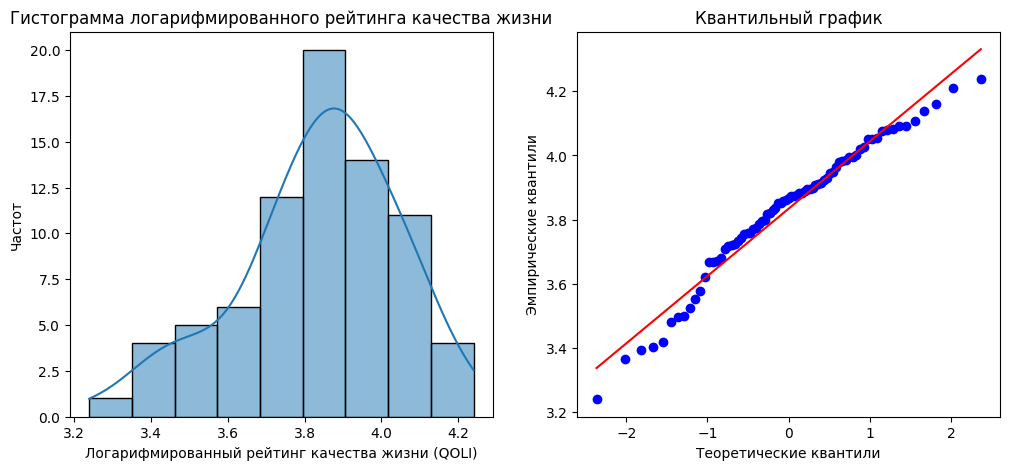

In [96]:
log_qoli_wo = np.log(qoli_wo)

fig, (x1, x2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(log_qoli_wo, kde=True, ax=x1)
x1.set_title('Гистограмма логарифмированного рейтинга качества жизни')
probplot(log_qoli_wo, plot=x2)
x2.set_title('Квантильный график')

x1.set_xlabel('Логарифмированный рейтинг качества жизни (QOLI)')
x1.set_ylabel('Частота')
x2.set_xlabel('Теоретические квантили')
x2.set_ylabel('Эмпирические квантили')

plt.show()


Можно заметить, что **после удаления выбросных значений вид распределения стал быть ближе к нормальному распределению**, что можно заметить по изменениям на гистограмме и квантильном графике.

Проверим это на `тесте Шапиро-Уилка`:

In [97]:
st, pvalue = shapiro(log_qoli_wo)
print(f'По тесту Шапиро-Уилка p-value составляет {pvalue:.4f}')

По тесту Шапиро-Уилка p-value составляет 0.0566


Так как p-value больше, чем заданный уровень ошибки, то можно сделать следующий вывод: при заданном уровне значимости гипотеза о принадлежности распределения к нормальному закону **не отвергается**. Следовательно, можно утверждать, что распределение принадлежит нормальному.

#### **Задание 5:**
Изобразим `скрипичный график` для логарифма рейтинга уровня качества жизни для каждого уровня фактора федерального округа:

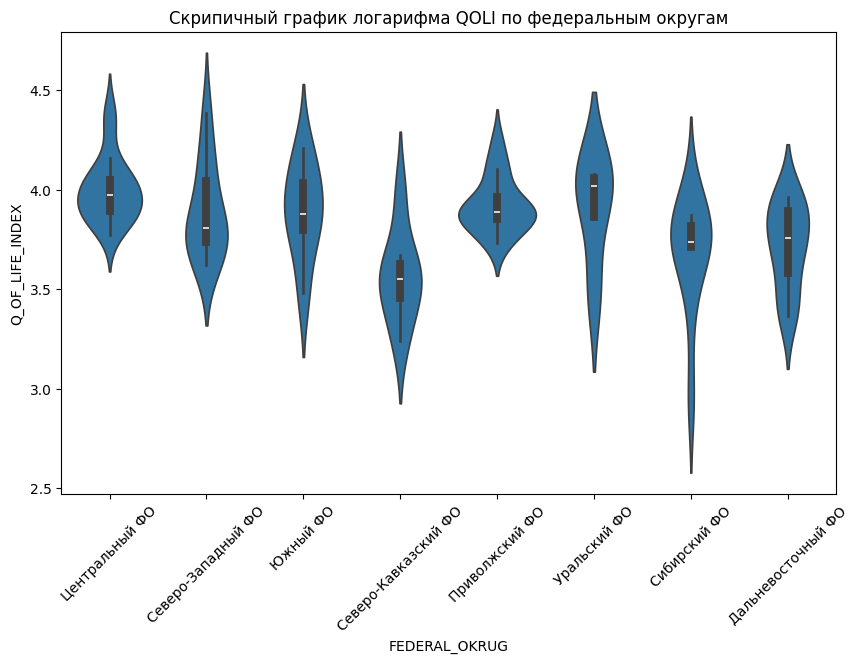

In [138]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='FEDERAL_OKRUG', y=log_qoli, data=data)
plt.xticks(rotation=45)
plt.title('Скрипичный график логарифма QOLI по федеральным округам')
plt.show()

Можно заметить, что между регионами присутствует разница в значениях рейтинга, откуда можно судить о том, что гипотеза о равенства средних скорее будет отвергаться. По этим данным можно также сказать, что наиболее оптимальные значения рейтинга приходятся на ЦФО, так как большая масса людей имеют схожие друг к другу довольно высокие значения. То есть, нет большого разрыва, что нельзя сказать про многие другие округа, например, про СФО. По вытянутости его графика можно заметить, что наблюдается существенный разрыв между разными людьми в уровне качества жизни.

**Проверим гипотезу о равенстве средних в группах**. Для начала проверим каждую группу на нормальность для того, чтобы проверить, можно ли применять к ним тесты. Например, для гипотезы о равенстве средних в группах, необходимо условие нормальности и гомогенности дисперсий. `Для начала проверим нормальность`:

In [131]:
gr = [np.log(part['Q_OF_LIFE_INDEX']).values for n, part in data.groupby('FEDERAL_OKRUG')]
pvals = [str(np.round(shapiro(x)[1], 4)) for x in gr]
print('Результаты тестов (p-value) по группам:')
print('\n'.join(pvals))

Результаты тестов (p-value) по группам:
0.0104
0.2551
0.1525
0.2327
0.7715
0.0384
0.0813
0.9453


Заметим, что тест Шапиро-Уилка на заданном уровне ошибки отвергается только для 2 групп. Поэтому можно сделать вывод, что, возможно, ANOVA может выдавать не совсем конкретные значения p-value. Но мы все равно проведем этот тест, но перед этим проведем `тест Левена` (гомогенность дисперсий, не требует нормальности распределения, поэтому берем не Бартлетта, а этот тест):

In [132]:
st, pval_lev = levene(*gr)
print(f"Тест Левена выдает p-value {pval_lev:.4f}")


Тест Левена выдает p-value 0.8848


Следовательно, гипотеза о гомогенности дисперсий **не отвергается** на заданном уровне значимости.

Так как тесты на нормальность не прошли во некоторых случаях, то проведем `тест Крускала-Уоллиса` на равенство медиан (этот тест не требует нормальности):

In [133]:
st, pval_kruskal = kruskal(*gr)
print(f"Тест на равенство медиан Крускала-Уоллиса выдает p-value {pval_kruskal:.4f}")


Тест на равенство медиан Крускала-Уоллиса выдает p-value 0.0004


И проведем `тест на равенство средних`:

In [121]:
st, pval_anova = f_oneway(*gr)
print(f"Тест на равенство средних выдает p-value {pval_anova:.4f}")


Тест на равенство средних выдает p-value 0.0001


По этим двум тестам можно заметить, что p-value настолько мал, что даже при маленькой вероятности ошибки гипотеза о равенстве средних между группами **будет отвергаться**. 

Следовательно, наблюдаются существенные различия между различными регионами по рейтингу уровня качества жизни, что можно было заметить и на скрипичных графиках.